In [2]:
# 1.1 Loading Initial Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1.2 Load Dataset
train=pd.read_csv("C:/Users/acer/Desktop/Machine Learning/Mahindra/training_dataset.csv")

In [4]:
# 1.3 Data Over View
train.head()

,Variable1,Variable2,Variable3,Variable4,Variable5,Variable6,Variable7,Variable8,Variable9,Variable10,...,Variable20,Variable21,Variable22,Variable23,Variable24,Variable25,Variable26,Variable27,Variable28,Target
0,1,ARO-4742,1,APHRNG1692,May-16,N,9.314022e+09,Col-6930,PKSA016674,USG1,...,NaN,NaN,VAR SULP TT3 PS,NaN,N,NaN,COM2,1150.0,MFTRC322,0
1,2,ARO-4928,2,APFPTV9946,Feb-17,N,9.251002e+09,Col-6930,PA2Z013889,USG4,...,NaN,NaN,VAR SULP TT4,NaN,N,NaN,COM1,1150.0,MFTRC322,0
2,3,ARO-3778,2,APHRNG1692,Dec-15,NaN,9.451552e+09,Col-4259,PCEM018562,USG4,...,NaN,NaN,VAR SULP DI TT3,NaN,N,NaN,COM3,1150.0,MFTRC322,0
3,4,ARO-4998,1,APFPTV154265,Sep-16,N,9.416109e+09,Col-4259,PTRW14933,USG4,...,NaN,NaN,VAR SULP DI TT3 PS,NaN,N,NaN,COM1,1000.0,MFTRC322,0
4,5,ARO-3627,2,APHRNG1692,Feb-16,N,9.500040e+09,Col-4259,PAM0026696,USG1,...,NaN,NaN,VAR SULP TT4 PS,NaN,N,NaN,COM1,1150.0,MAHEC465,0


In [5]:
train.shape

(199609, 29)

In [6]:
train.dtypes

Variable1       int64
Variable2      object
Variable3       int64
Variable4      object
Variable5      object
Variable6      object
Variable7     float64
Variable8      object
Variable9      object
Variable10     object
Variable11     object
Variable12    float64
Variable13     object
Variable14     object
Variable15     object
Variable16    float64
Variable17     object
Variable18     object
Variable19     object
Variable20     object
Variable21    float64
Variable22     object
Variable23     object
Variable24     object
Variable25     object
Variable26     object
Variable27    float64
Variable28     object
Target          int64
dtype: object

In [7]:
train.columns

Index(['Variable1', 'Variable2', 'Variable3', 'Variable4', 'Variable5',
       'Variable6', 'Variable7', 'Variable8', 'Variable9', 'Variable10',
       'Variable11', 'Variable12', 'Variable13', 'Variable14', 'Variable15',
       'Variable16', 'Variable17', 'Variable18', 'Variable19', 'Variable20',
       'Variable21', 'Variable22', 'Variable23', 'Variable24', 'Variable25',
       'Variable26', 'Variable27', 'Variable28', 'Target'],
      dtype='object')

In [8]:
train.describe()

,Variable1,Variable3,Variable7,Variable12,Variable16,Variable21,Variable27,Target
count,199609.000000,199609.000000,1.880740e+05,162791.000000,24905.000000,0.0,165446.000000,199609.000000
mean,99805.000000,3.629831,9.437428e+09,168.695659,211.760610,NaN,1433.632635,0.169827
std,57622.299279,2.273030,1.937600e+08,153.383607,5882.969575,NaN,588.659606,0.375482
min,1.000000,0.000000,9.110001e+09,1.000000,0.000000,NaN,1.000000,0.000000
25%,49903.000000,2.000000,9.262702e+09,80.000000,1.000000,NaN,1150.000000,0.000000
50%,99805.000000,3.000000,9.442907e+09,110.000000,1.000000,NaN,1150.000000,0.000000
75%,149707.000000,4.000000,9.591303e+09,190.000000,1.000000,NaN,1600.000000,0.000000
max,199609.000000,9.000000,9.855457e+09,650.000000,500000.000000,NaN,3000.000000,1.000000


In [9]:
#From Intital overview
#Variable 1 = ID
#Variable 7 = Mobile Number

In [10]:
#Checking target class Imbalance 
counts=train.Target.value_counts()
counts

0    165710
1     33899
Name: Target, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

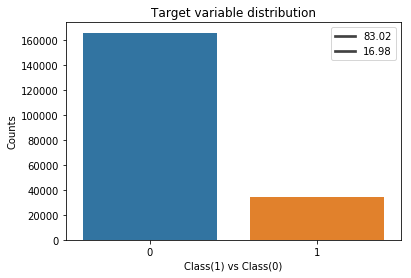

In [11]:
#Visualising Target Class
sns.barplot(x=counts.index,y=counts)
plt.ylabel("Counts")
plt.xlabel("Class(1) vs Class(0)")
plt.title("Target variable distribution")
plt.legend(round(counts/counts.sum()*100,2))
plt.show

#Class imbalance is not so huge

In [12]:
#Lets check Varibale 3
train.Variable3.value_counts()

2    61751
3    58878
8    26587
4    21776
1     8971
7     8061
0     4786
5     4348
9     3589
6      862
Name: Variable3, dtype: int64

In [13]:
train.Variable3.isnull().sum()
#So we can conclude that variable 3 is ordianal value...may be some rating from 0 to 9

0

In [18]:
#Lets check for is missing value
col_null=train.isnull().sum()
col_null

Variable1          0
Variable2          0
Variable3          0
Variable4          0
Variable5          0
Variable6      46391
Variable7      11535
Variable8          0
Variable9          0
Variable10         0
Variable11         0
Variable12     36818
Variable13         0
Variable14         0
Variable15         0
Variable16    174704
Variable17         0
Variable18     58539
Variable19         0
Variable20    175780
Variable21    199609
Variable22         0
Variable23    160126
Variable24         0
Variable25    182801
Variable26         0
Variable27     34163
Variable28         0
Target             0
dtype: int64

In [19]:
#Lets check for is missing value in terms of %
col_null=col_null[col_null>0]/train.shape[0]*100
col_null

Variable6      23.240936
Variable7       5.778798
Variable12     18.445060
Variable16     87.523108
Variable18     29.326834
Variable20     88.062162
Variable21    100.000000
Variable23     80.219830
Variable25     91.579538
Variable27     17.114960
dtype: float64

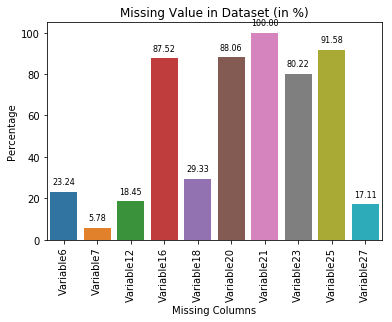

In [20]:
#Visulaising Missing Values
splot=sns.barplot(x=col_null.index, y=col_null)
plt.xlabel("Missing Columns")
plt.ylabel("Percentage")
plt.title("Missing Value in Dataset (in %)")
plt.xticks(rotation="vertical")
for p in splot.patches:#for annonating - reference stackoverflow
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
                          p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), 
    textcoords = 'offset points',fontsize=8)
plt.show()

In [21]:
#Treating train by separating them as per their datatypes
train.dtypes

Variable1       int64
Variable2      object
Variable3       int64
Variable4      object
Variable5      object
Variable6      object
Variable7     float64
Variable8      object
Variable9      object
Variable10     object
Variable11     object
Variable12    float64
Variable13     object
Variable14     object
Variable15     object
Variable16    float64
Variable17     object
Variable18     object
Variable19     object
Variable20     object
Variable21    float64
Variable22     object
Variable23     object
Variable24     object
Variable25     object
Variable26     object
Variable27    float64
Variable28     object
Target          int64
dtype: object

In [22]:
# INT Datatypes
#Variable1 = ID
#Variable3 = no misisng values (seems ordinal ratings)
#Target 

In [23]:
#Float Datatypes
#Variable7 - Mobile Numbers - Will treat 5.78% missing data as separate class
#Variable12 - missing value 18.5%
#Variable16 - 87%of data are misising
#Variable21 - All Blank - Can be deleted
#Variable27 - 17.11 % missing data

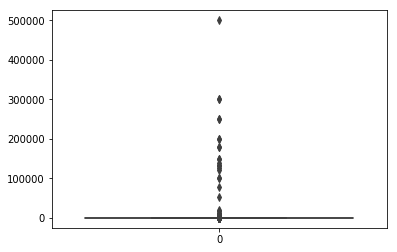

In [26]:
#Checking Variable 16 
sns.boxplot(data= train.Variable16)


In [41]:
train.Variable16.skew()
#highly skew toward right

50.875586591691395

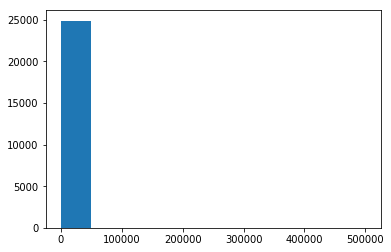

In [33]:
#Distribution Plot of Variable 16
sns.distplot(train.Variable16[train.Variable16>=0],)

In [40]:
train.Variable16.value_counts()

1.0         20102
2.0          2248
3.0           608
0.0           415
4.0           207
5.0           139
2000.0         91
1000.0         80
1500.0         78
2012.0         72
1150.0         51
2010.0         50
2500.0         46
2011.0         44
6.0            41
2009.0         32
1250.0         32
2013.0         30
20.0           28
800.0          27
8.0            26
10.0           26
2014.0         25
1200.0         25
850.0          20
750.0          18
2015.0         18
15.0           17
700.0          17
7.0            15
            ...  
60.0            1
57.0            1
968.0           1
965.0           1
29.0            1
1180.0          1
180015.0        1
1350.0          1
180000.0        1
12500.0         1
1400.0          1
120000.0        1
1428.0          1
650.0           1
500000.0        1
45.0            1
2540.0          1
2533.0          1
1258.0          1
125000.0        1
490.0           1
2017.0          1
78000.0         1
31.0            1
23.0      

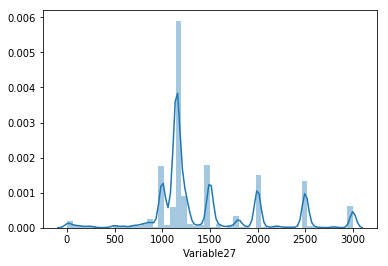

In [38]:
#Distribution Plot of Variable 27
sns.distplot(train.Variable27[train.Variable27>=0],)

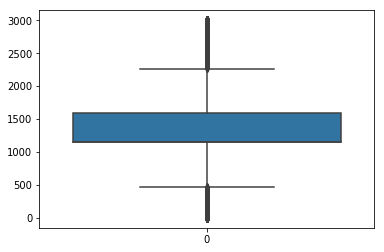

In [43]:
sns.boxplot(data= train.Variable27)

In [39]:
train.Variable27.value_counts()

1150.0    47994
1500.0    17569
1000.0    17441
2000.0    14801
2500.0    13240
1200.0     9987
1250.0     8454
3000.0     6073
1100.0     5361
1800.0     2972
900.0      1146
800.0      1015
1300.0      996
1400.0      849
1600.0      826
850.0       822
500.0       740
700.0       652
1050.0      620
2200.0      610
1.0         609
1700.0      521
750.0       431
860.0       415
1350.0      413
600.0       346
2800.0      341
100.0       337
1140.0      300
1900.0      275
          ...  
2534.0        1
1286.0        1
432.0         1
2535.0        1
2001.0        1
410.0         1
778.0         1
1552.0        1
586.0         1
2543.0        1
2544.0        1
336.0         1
2546.0        1
2360.0        1
2608.0        1
2551.0        1
2328.0        1
501.0         1
507.0         1
1025.0        1
895.0         1
1457.0        1
856.0         1
1768.0        1
128.0         1
2311.0        1
2308.0        1
1005.0        1
1377.0        1
1504.0        1
Name: Variable27, Length

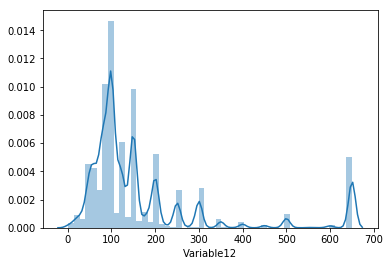

In [42]:
#Distribution Plot of Variable 12
sns.distplot(train.Variable12[train.Variable12>=0],)

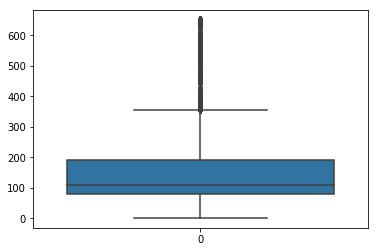

In [44]:
sns.boxplot(data= train.Variable12)

In [4]:
#Feature Engineering of Numerical data
#Variable 7: Converting it to Class of either Mobile numbers provided or NOT, and dropping the original column

train["Variable7_M"]=np.where(train.Variable7>=1000_000_000,1,0)
train.head()

,Variable1,Variable2,Variable3,Variable4,Variable5,Variable6,Variable7,Variable8,Variable9,Variable10,...,Variable21,Variable22,Variable23,Variable24,Variable25,Variable26,Variable27,Variable28,Target,Variable7_M
0,1,ARO-4742,1,APHRNG1692,May-16,N,9.314022e+09,Col-6930,PKSA016674,USG1,...,NaN,VAR SULP TT3 PS,NaN,N,NaN,COM2,1150.0,MFTRC322,0,1
1,2,ARO-4928,2,APFPTV9946,Feb-17,N,9.251002e+09,Col-6930,PA2Z013889,USG4,...,NaN,VAR SULP TT4,NaN,N,NaN,COM1,1150.0,MFTRC322,0,1
2,3,ARO-3778,2,APHRNG1692,Dec-15,NaN,9.451552e+09,Col-4259,PCEM018562,USG4,...,NaN,VAR SULP DI TT3,NaN,N,NaN,COM3,1150.0,MFTRC322,0,1
3,4,ARO-4998,1,APFPTV154265,Sep-16,N,9.416109e+09,Col-4259,PTRW14933,USG4,...,NaN,VAR SULP DI TT3 PS,NaN,N,NaN,COM1,1000.0,MFTRC322,0,1
4,5,ARO-3627,2,APHRNG1692,Feb-16,N,9.500040e+09,Col-4259,PAM0026696,USG1,...,NaN,VAR SULP TT4 PS,NaN,N,NaN,COM1,1150.0,MAHEC465,0,1


In [47]:
train.Variable7_M.value_counts()/train.shape[0]

1    0.942212
0    0.057788
Name: Variable7_M, dtype: float64

In [5]:
#Dropping Variable 7
train.drop(columns=['Variable7'], inplace=True)
train.shape

(199609, 29)

In [6]:
#Also dropping Variable 21 (No Values)
train.drop(columns=['Variable21'], inplace=True)
train.shape

(199609, 28)

In [7]:
#Imputing Variable 12 and Variable 27 with median value
train.Variable12=train.Variable12.fillna(train.Variable12.median())
train.Variable27=train.Variable27.fillna(train.Variable27.median())

In [56]:
train.Variable12.isnull().sum()

0

In [8]:
#Categorical Variable with missing values more than 60% is to be dropped
#Variable16, Variable20, Variable23, Variable25
train=train.drop(columns=['Variable16','Variable20', 'Variable23', 'Variable25'], axis=1)
train.shape

(199609, 24)

In [10]:
#Variable 5 is Date - MMM Year Format
#its better to convert them into numbers
# import datetime
import datetime
from datetime import date
from dateutil.parser import parse

In [112]:
#Checking
print(datetime.datetime.strptime(dt_min, "%b-%y"))

2016-04-01 00:00:00


In [11]:
dt=train.Variable5
dt.head()

0    May-16
1    Feb-17
2    Dec-15
3    Sep-16
4    Feb-16
Name: Variable5, dtype: object

In [12]:
#Converting Variable5 into date
train.Variable5=[datetime.datetime.strptime(x, '%b-%y') for x in dt]

In [13]:
dt_min=train.Variable5.min()
dt_min

Timestamp('2015-11-01 00:00:00')

In [14]:

train["Variable5_Dt"]=(train.Variable5-dt_min)
train.Variable5_Dt.head()

0   182 days
1   458 days
2    30 days
3   305 days
4    92 days
Name: Variable5_Dt, dtype: timedelta64[ns]

In [15]:
#train["Variable5_dt1"]=train.Variable5_Dt.str.split(" ")
train['Variable5_Dt1']=train.Variable5_Dt.astype('timedelta64[D]')
train.Variable5_Dt1.head()

0    182.0
1    458.0
2     30.0
3    305.0
4     92.0
Name: Variable5_Dt1, dtype: float64

In [146]:
train.head()

,Variable1,Variable2,Variable3,Variable4,Variable5,Variable6,Variable8,Variable9,Variable10,Variable11,...,Variable19,Variable22,Variable24,Variable26,Variable27,Variable28,Target,Variable7_M,Variable5_Dt,Variable5_Dt1
0,1,ARO-4742,1,APHRNG1692,2016-05-01,N,Col-6930,PKSA016674,USG1,LOTYPE1000,...,LKSA18434,VAR SULP TT3 PS,N,COM2,1150.0,MFTRC322,0,1,182 days,182.0
1,2,ARO-4928,2,APFPTV9946,2017-02-01,N,Col-6930,PA2Z013889,USG4,LOTYPE500,...,LA2Z11295,VAR SULP TT4,N,COM1,1150.0,MFTRC322,0,1,458 days,458.0
2,3,ARO-3778,2,APHRNG1692,2015-12-01,NaN,Col-4259,PCEM018562,USG4,LOTYPE1000,...,LCEM41939,VAR SULP DI TT3,N,COM3,1150.0,MFTRC322,0,1,30 days,30.0
3,4,ARO-4998,1,APFPTV154265,2016-09-01,N,Col-4259,PTRW14933,USG4,LOTYPE500,...,LTW013178,VAR SULP DI TT3 PS,N,COM1,1000.0,MFTRC322,0,1,305 days,305.0
4,5,ARO-3627,2,APHRNG1692,2016-02-01,N,Col-4259,PAM0026696,USG1,LOTYPE1000,...,LAUM32146,VAR SULP TT4 PS,N,COM1,1150.0,MAHEC465,0,1,92 days,92.0


In [16]:
#Dropping Variable5 and Variable5_Dt as we have variable5_Dt1 as new variable
train=train.drop(columns=['Variable5_Dt','Variable5'], axis=1)
train.shape

(199609, 24)

In [17]:
#Create Dataset for categorical or binary variables
train_cat=train.select_dtypes(include = ['object'])

In [18]:
#variable to keep in train
col=['Variable3','Variable5_Dt1', 'Variable7_M', 'Variable12','Variable27']
train.columns

Index(['Variable1', 'Variable2', 'Variable3', 'Variable4', 'Variable6',
       'Variable8', 'Variable9', 'Variable10', 'Variable11', 'Variable12',
       'Variable13', 'Variable14', 'Variable15', 'Variable17', 'Variable18',
       'Variable19', 'Variable22', 'Variable24', 'Variable26', 'Variable27',
       'Variable28', 'Target', 'Variable7_M', 'Variable5_Dt1'],
      dtype='object')

In [19]:
#features and traget
y=train.Target
X=train[col]
print(y.head())
print(X.head())

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64
   Variable3  Variable5_Dt1  Variable7_M  Variable12  Variable27
0          1          182.0            1       180.0      1150.0
1          2          458.0            1        80.0      1150.0
2          2           30.0            1       100.0      1150.0
3          1          305.0            1       300.0      1000.0
4          2           92.0            1       100.0      1150.0


In [96]:
train_cat.describe()

,Variable2,Variable4,Variable5,Variable6,Variable8,Variable9,Variable10,Variable11,Variable13,Variable14,Variable15,Variable17,Variable18,Variable19,Variable22,Variable24,Variable26,Variable28
count,199609,199609,199609,153218,199609,199609,199609,199609,199609,199609,199609,199609,141070,199609,199609,199609,199609,199609
unique,20,20,17,2,13,270,4,3,24,5,5,17,6,540,16,2,3,63
top,ARO-1926,APHRNG1692,Oct-16,N,Col-4259,PINR14118,USG4,LOTYPE500,SC-80722,D452,Type-206,MFTRV9754,N,LSA011380,VAR SULP TT4 PS,N,COM1,MFTRC322
freq,24703,70835,14113,145031,114212,4532,96922,102626,126919,68041,147501,174719,121065,3350,43735,199471,130680,174719


In [20]:
#Dropping Variable5 from train_cat since its a date
train_cat.drop(columns=['Variable5'], inplace=True)
train_cat.shape

KeyError: "['Variable5'] not found in axis"

In [98]:
train_cat.isnull().sum()
#Around 21 and 28% data misising in Variable 6 and variable 18
#Its bettre to treat as a differnt class

Variable2         0
Variable4         0
Variable6     46391
Variable8         0
Variable9         0
Variable10        0
Variable11        0
Variable13        0
Variable14        0
Variable15        0
Variable17        0
Variable18    58539
Variable19        0
Variable22        0
Variable24        0
Variable26        0
Variable28        0
dtype: int64

In [21]:
#Imputing Variable 6 and Variable 18 with separate class
train_cat.Variable6=train_cat.Variable6.fillna("Blank")
train_cat.Variable18=train_cat.Variable18.fillna("Blank")

C:\Users\acer\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [22]:
train_cat.isnull().sum()

Variable2     0
Variable4     0
Variable6     0
Variable8     0
Variable9     0
Variable10    0
Variable11    0
Variable13    0
Variable14    0
Variable15    0
Variable17    0
Variable18    0
Variable19    0
Variable22    0
Variable24    0
Variable26    0
Variable28    0
dtype: int64

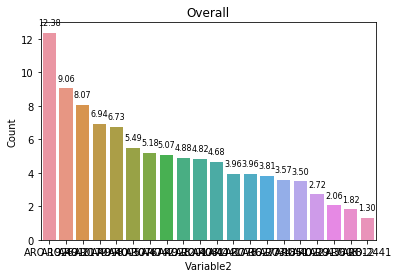

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


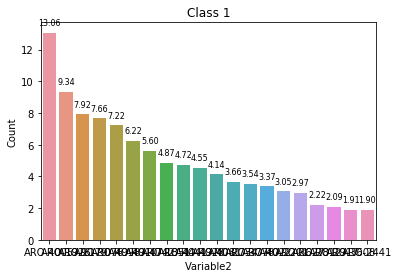

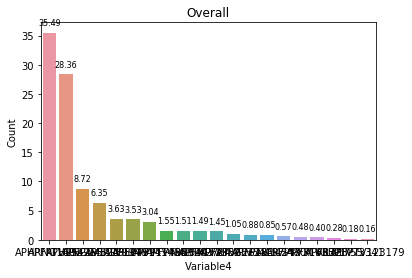

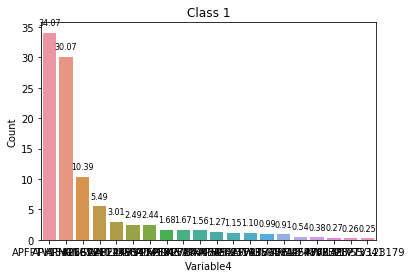

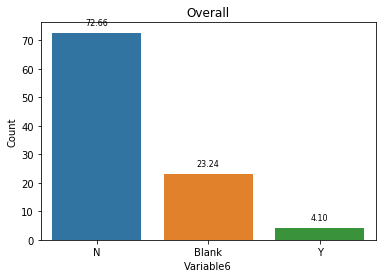

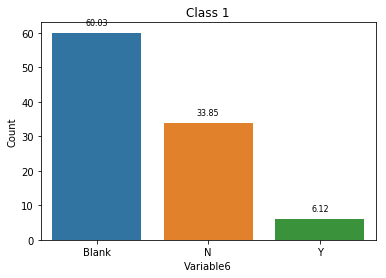

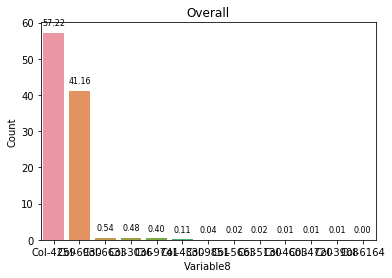

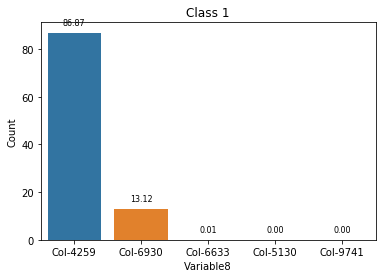

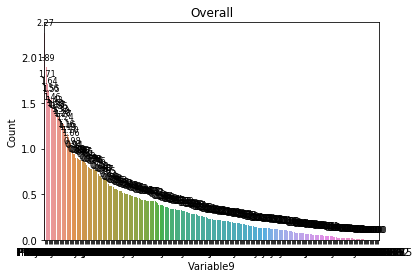

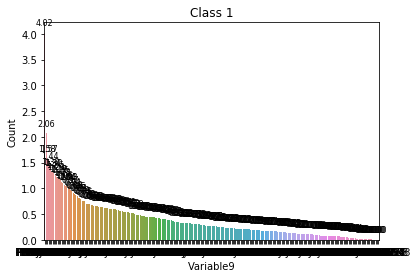

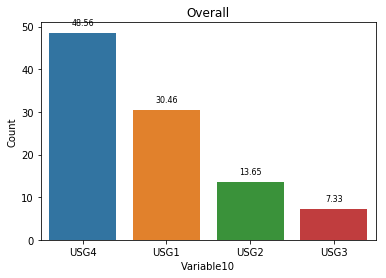

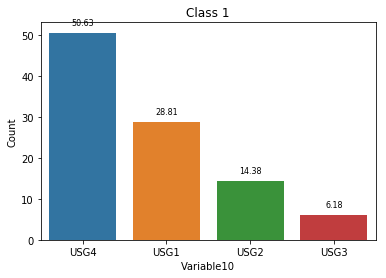

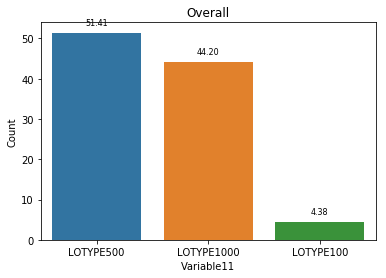

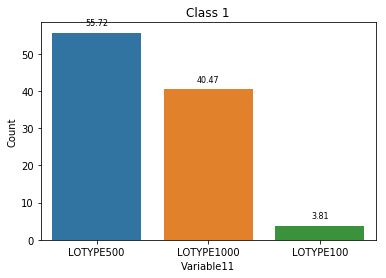

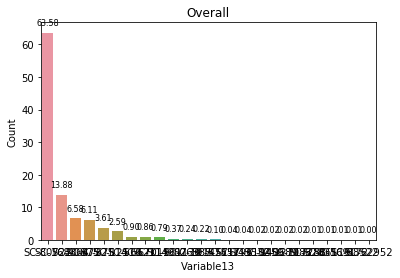

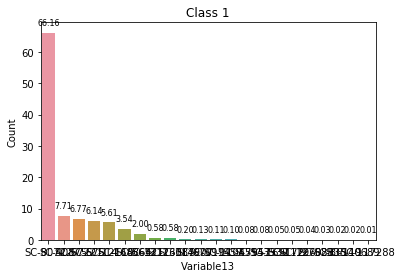

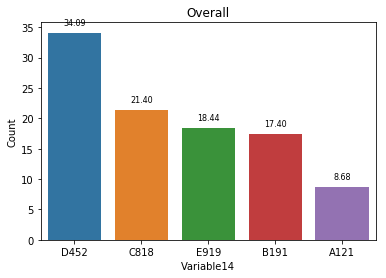

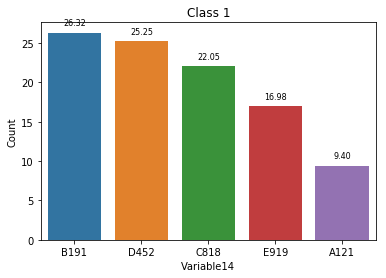

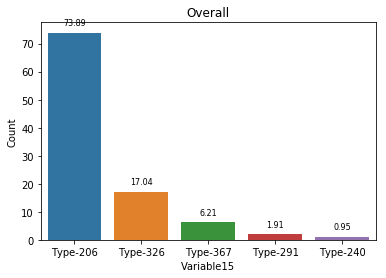

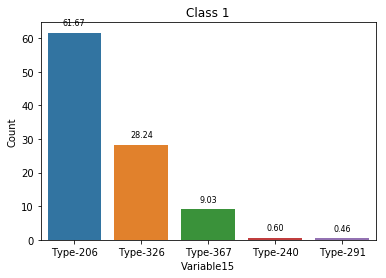

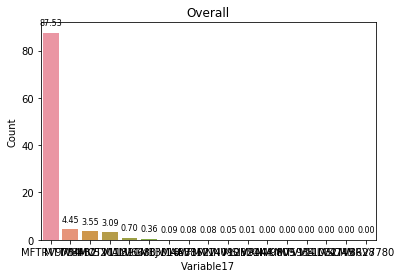

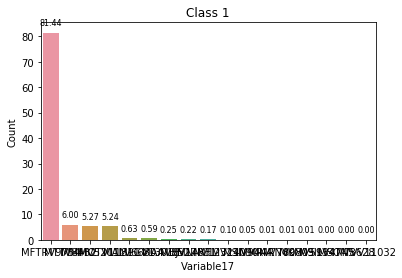

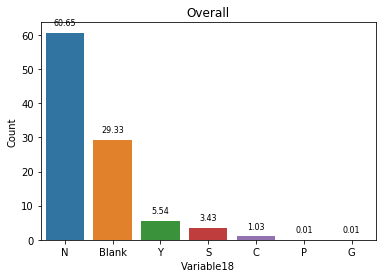

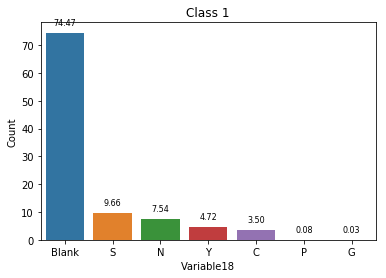

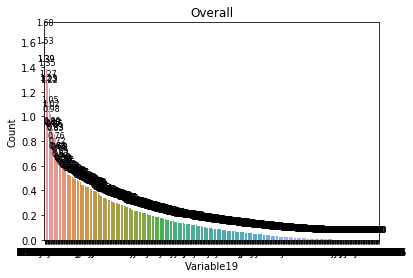

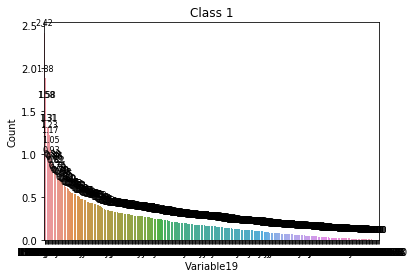

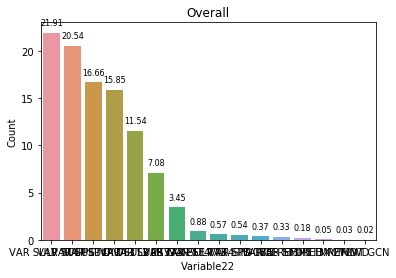

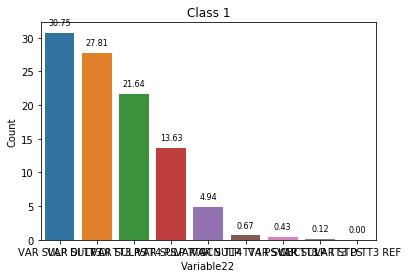

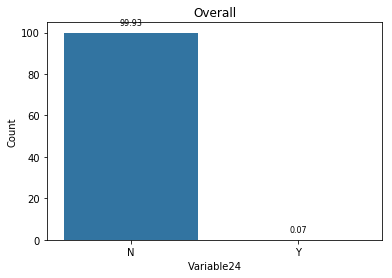

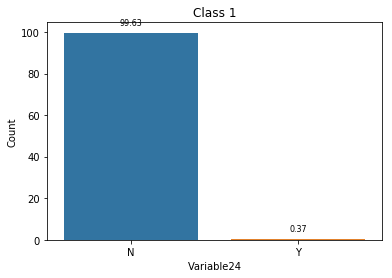

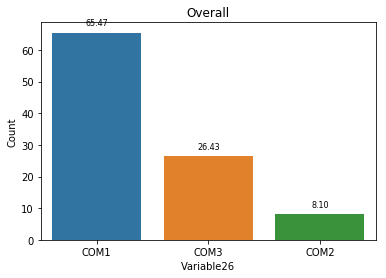

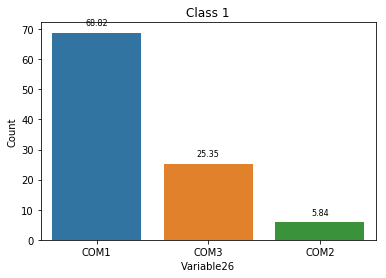

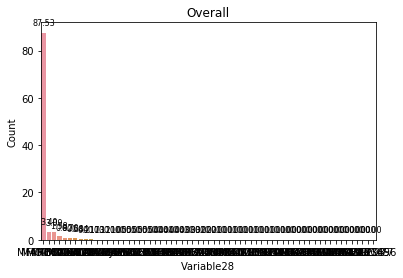

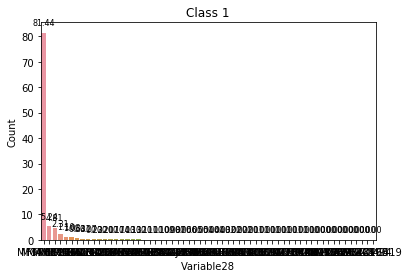

In [104]:
#Visualising Bar Plot of categorical col
for col in range(len(train_cat.columns)):
    counts = train_cat.iloc[:,col].value_counts()/train.shape[0]*100
    #print(counts)
    splot=sns.barplot(x=counts.index, y=counts)
    plt.title("Overall")
    plt.ylabel('Count')
    plt.xlabel(counts.name)
    for p in splot.patches:#for annonating - reference stackoverflow
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
                        p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), 
                        textcoords = 'offset points',fontsize=8)
    plt.show()
    #for class 1 target
    counts = train_cat.ix[train.Target==1,col].value_counts()/train[train.Target==1].shape[0]*100
    #print(counts)
    splot=sns.barplot(x=counts.index, y=counts)
    plt.title("Class 1")
    plt.ylabel('Count')
    plt.xlabel(counts.name)
    for p in splot.patches:#for annonating - reference stackoverflow
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
                        p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), 
                        textcoords = 'offset points',fontsize=8)
    plt.show()

In [105]:
#Function for conducting chi square and deleting features which are not associated
result=pd.DataFrame()
def UDF_chiSqrTest(df,d=train):
    from scipy.stats import chi2_contingency
    b4=df.shape[1]
    global result
    for col in df:
        cont_table=pd.crosstab(d.Target,df[col])
        xsq,pvalue,dof,expected=chi2_contingency(cont_table)
        print(col)
        print("X Sqr: ",xsq," pvalue:",pvalue)
        if(pvalue>0.05):
            print("Column to be DROPPED \n ")
            df=df.drop(col,axis=1)
        else:    
            print("Column Retained \n ")
    print("No of Columns Retained: ",df.shape[1])
    print('Columns Retained:\n',df.columns)
    print("No of Columns Dropped: ",b4-df.shape[1])
    result=df;#Storing result in test_result

In [106]:
UDF_chiSqrTest(train_cat)

Variable2
X Sqr:  4338.926072932892  pvalue: 0.0
Column Retained 
 
Variable4
X Sqr:  1745.7732880062872  pvalue: 0.0
Column Retained 
 
Variable6
X Sqr:  32647.017590070085  pvalue: 0.0
Column Retained 
 
Variable8
X Sqr:  14725.900113109727  pvalue: 0.0
Column Retained 
 
Variable9
X Sqr:  12155.75426062639  pvalue: 0.0
Column Retained 
 
Variable10
X Sqr:  161.76572367132246  pvalue: 7.621895479075111e-35
Column Retained 
 
Variable11
X Sqr:  306.42036948105863  pvalue: 2.895090843765739e-67
Column Retained 
 
Variable13
X Sqr:  6953.824654581937  pvalue: 0.0
Column Retained 
 
Variable14
X Sqr:  2884.194496028509  pvalue: 0.0
Column Retained 
 
Variable15
X Sqr:  4859.59678894229  pvalue: 0.0
Column Retained 
 
Variable17
X Sqr:  1882.4012071915943  pvalue: 0.0
Column Retained 
 
Variable18
X Sqr:  54610.92650199451  pvalue: 0.0
Column Retained 
 
Variable19
X Sqr:  14096.87809964484  pvalue: 0.0
Column Retained 
 
Variable22
X Sqr:  17903.791143092076  pvalue: 0.0
Column Retained 

In [107]:
#From Bar plot and chi square test it is evident that all the variable are significant
#Son no need to drop any column

#Observing categorical counts in column  
for col in train_cat:
    #print(train_cat[col].value_counts())
    print(col," : ",train_cat[col].value_counts().shape[0], ' Unique Categories')

Variable2  :  20  Unique Categories
Variable4  :  20  Unique Categories
Variable6  :  3  Unique Categories
Variable8  :  13  Unique Categories
Variable9  :  270  Unique Categories
Variable10  :  4  Unique Categories
Variable11  :  3  Unique Categories
Variable13  :  24  Unique Categories
Variable14  :  5  Unique Categories
Variable15  :  5  Unique Categories
Variable17  :  17  Unique Categories
Variable18  :  7  Unique Categories
Variable19  :  540  Unique Categories
Variable22  :  16  Unique Categories
Variable24  :  2  Unique Categories
Variable26  :  3  Unique Categories
Variable28  :  63  Unique Categories


In [108]:
#So now we need to craete dummy variables
train_cat.columns

Index(['Variable2', 'Variable4', 'Variable6', 'Variable8', 'Variable9',
       'Variable10', 'Variable11', 'Variable13', 'Variable14', 'Variable15',
       'Variable17', 'Variable18', 'Variable19', 'Variable22', 'Variable24',
       'Variable26', 'Variable28'],
      dtype='object')

In [35]:
train_cat_dummy=pd.get_dummies(train_cat,columns=['Variable2', 'Variable4', 'Variable6', 'Variable8', 'Variable9',
       'Variable10', 'Variable11', 'Variable13', 'Variable14', 'Variable15',
       'Variable17', 'Variable18', 'Variable19', 'Variable22', 'Variable24',
       'Variable26', 'Variable28'],drop_first=True)
train_cat_dummy.head()

,Variable2_ARO-1926,Variable2_ARO-2179,Variable2_ARO-2201,Variable2_ARO-2441,Variable2_ARO-2734,Variable2_ARO-2812,Variable2_ARO-2917,Variable2_ARO-3076,Variable2_ARO-3608,Variable2_ARO-3627,...,Variable28_MTFC136,Variable28_MTGC410,Variable28_MTMC199,Variable28_MTTC212,Variable28_MTXC348,Variable28_MVKC205,Variable28_MVKRC387,Variable28_MWRC277,Variable28_MXYC496,Variable28_MZPC395
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [157]:
X=pd.concat((X,train_cat_dummy),axis=1)
X.shape

(199609, 1003)

In [158]:
#Scaling Data
from sklearn.preprocessing import MinMaxScaler

# Set up scaler and create a scaled input matrix
scaler = MinMaxScaler()
# MinMaxScalar outputs data as a numpy array (which is necessary for XGBoost)
X = scaler.fit_transform(X)  
X.shape  

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(199609, 1003)

In [159]:
#Splitting data in test and train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=143)

In [160]:
#Building Models
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression
#from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

models = []
#models.append(('LogisticRegression', LogisticRegression()))
#models.append(('XGBoost', XGBClassifier()))
models.append(('RandomForest', RandomForestClassifier()))

In [161]:
#Training model
for name, model in models:
    print('\n++++++++++++++ {} ++++++++++++++\n'.format(name))

    # Train model
    print('\n--- Training model using {} ---'.format(name))
    model.fit(X_train, y_train)
    print('=== DONE ===\n')
    
    # Make predictions on the test-set
    y_pred = model.predict(X_test)

    # Classification report
    report = classification_report(y_test, y_pred)
    print('\n', report, '\n')
    
    # Classification report
    print('Conf Matrix: \n', confusion_matrix(y_test,y_pred))
    
    print('======================================\n')


++++++++++++++ RandomForest ++++++++++++++


--- Training model using RandomForest ---


C:\Users\acer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


=== DONE ===


               precision    recall  f1-score   support

           0       0.96      0.98      0.97     33011
           1       0.89      0.81      0.85      6911

   micro avg       0.95      0.95      0.95     39922
   macro avg       0.92      0.89      0.91     39922
weighted avg       0.95      0.95      0.95     39922
 

Conf Matrix: 
 [[32306   705]
 [ 1311  5600]]



In [162]:
#Saving the best fit model 
final_model=models[0][1]

y_pred=final_model.predict(X_test)
pred_prob=final_model.predict_proba(X_test)[:,1]
#print(classification_report(y_test, y_pred))
print("Accuracy score: ",accuracy_score(y_test, y_pred))
print('ROC-AUC score: ',roc_auc_score(y_test,pred_prob))

Accuracy score:  0.9495015279795601
ROC-AUC score:  0.9723067278350424


In [163]:
#Satisfied with the model

In [24]:
#====================Final Submission ==========================================
# 1.2 Load Dataset
test2=pd.read_csv("C:/Users/acer/Desktop/Machine Learning/Mahindra/test2_data.csv")

#Variable 7: Converting it to Class of either Mobile numbers provided or NOT, and dropping the original column

test2["Variable7_M"]=np.where(test2.Variable7>=1000_000_000,1,0)
test2.head()

#Converting Variable5 into date
dt=test2.Variable5
test2.Variable5=[datetime.datetime.strptime(x, '%b-%y') for x in dt]


dt_min=test2.Variable5.min()
dt_min

test2["Variable5_Dt"]=(test2.Variable5-dt_min)
test2.Variable5_Dt.head()

#train["Variable5_dt1"]=train.Variable5_Dt.str.split(" ")
test2['Variable5_Dt1']=test2.Variable5_Dt.astype('timedelta64[D]')
test2.Variable5_Dt1.head()

#Drop unnecessary column
test2=test2.drop(columns=['Variable7','Variable21','Variable16','Variable20', 'Variable23', 'Variable25',
                         'Variable5_Dt','Variable5'], axis=1)
test2.shape



(72581, 23)

In [25]:
#Imputing Variable 12 and Variable 27 with median value
test2.Variable12=test2.Variable12.fillna(test2.Variable12.median())
test2.Variable27=test2.Variable27.fillna(test2.Variable27.median())

In [26]:
#Create Dataset for categorical or binary variables
test_cat=test2.select_dtypes(include = ['object'])

#Imputing Variable 6 and Variable 18 with separate class
test_cat.Variable6=train_cat.Variable6.fillna("Blank")
test_cat.Variable18=train_cat.Variable18.fillna("Blank")
test_cat.isnull().sum()

Variable2     0
Variable4     0
Variable6     0
Variable8     0
Variable9     0
Variable10    0
Variable11    0
Variable13    0
Variable14    0
Variable15    0
Variable17    0
Variable18    0
Variable19    0
Variable22    0
Variable24    0
Variable26    0
Variable28    0
dtype: int64

In [27]:
col=['Variable3','Variable5_Dt1', 'Variable7_M', 'Variable12','Variable27']

X1=test2[col]

In [28]:
test_cat_dummy=pd.get_dummies(test_cat,columns=['Variable2', 'Variable4', 'Variable6', 'Variable8', 'Variable9',
       'Variable10', 'Variable11', 'Variable13', 'Variable14', 'Variable15',
       'Variable17', 'Variable18', 'Variable19', 'Variable22', 'Variable24',
       'Variable26', 'Variable28'],drop_first=True)
test_cat_dummy.head()

,Variable2_ARO-1926,Variable2_ARO-2179,Variable2_ARO-2201,Variable2_ARO-2441,Variable2_ARO-2734,Variable2_ARO-2812,Variable2_ARO-2917,Variable2_ARO-3076,Variable2_ARO-3608,Variable2_ARO-3627,...,Variable28_MT15C184,Variable28_MT40C420,Variable28_MTCC192,Variable28_MTFC136,Variable28_MTMC199,Variable28_MTTC212,Variable28_MTXC348,Variable28_MVKC205,Variable28_MVKRC387,Variable28_MZPC395
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
var_to_keep=test_cat_dummy.columns
var_to_keep

Index(['Variable2_ARO-1926', 'Variable2_ARO-2179', 'Variable2_ARO-2201',
       'Variable2_ARO-2441', 'Variable2_ARO-2734', 'Variable2_ARO-2812',
       'Variable2_ARO-2917', 'Variable2_ARO-3076', 'Variable2_ARO-3608',
       'Variable2_ARO-3627',
       ...
       'Variable28_MT15C184', 'Variable28_MT40C420', 'Variable28_MTCC192',
       'Variable28_MTFC136', 'Variable28_MTMC199', 'Variable28_MTTC212',
       'Variable28_MTXC348', 'Variable28_MVKC205', 'Variable28_MVKRC387',
       'Variable28_MZPC395'],
      dtype='object', length=948)

In [39]:
X1=pd.concat((X1,test_cat_dummy),axis=1)
X1.shape

(72581, 953)

In [172]:
X1.columns

Index(['Variable3', 'Variable5_Dt1', 'Variable7_M', 'Variable12', 'Variable27',
       'Variable2_ARO-1926', 'Variable2_ARO-2179', 'Variable2_ARO-2201',
       'Variable2_ARO-2441', 'Variable2_ARO-2734',
       ...
       'Variable28_MT15C184', 'Variable28_MT40C420', 'Variable28_MTCC192',
       'Variable28_MTFC136', 'Variable28_MTMC199', 'Variable28_MTTC212',
       'Variable28_MTXC348', 'Variable28_MVKC205', 'Variable28_MVKRC387',
       'Variable28_MZPC395'],
      dtype='object', length=953)

In [40]:
#Scaling Data
from sklearn.preprocessing import MinMaxScaler

# Set up scaler and create a scaled input matrix
scaler = MinMaxScaler()
# MinMaxScalar outputs data as a numpy array (which is necessary for XGBoost)
X1 = scaler.fit_transform(X1)  
X1.shape 

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(72581, 953)

In [187]:
#Prdicting for test2
final_pred=final_model.predict(X1)

ValueError: Number of features of the model must match the input. Model n_features is 1003 and input n_features is 953 

In [50]:
var_to_keep

Index(['Variable2_ARO-1926', 'Variable2_ARO-2179', 'Variable2_ARO-2201',
       'Variable2_ARO-2441', 'Variable2_ARO-2734', 'Variable2_ARO-2812',
       'Variable2_ARO-2917', 'Variable2_ARO-3076', 'Variable2_ARO-3608',
       'Variable2_ARO-3627',
       ...
       'Variable28_MT15C184', 'Variable28_MT40C420', 'Variable28_MTCC192',
       'Variable28_MTFC136', 'Variable28_MTMC199', 'Variable28_MTTC212',
       'Variable28_MTXC348', 'Variable28_MVKC205', 'Variable28_MVKRC387',
       'Variable28_MZPC395'],
      dtype='object', length=948)

In [57]:
#no of varoable not matching, may be due to absence of 
#some categories in test data
train_cat_dummy=train_cat_dummy[var_to_keep]

KeyError: "['Variable28_MAL1C300', 'Variable28_MCRVC257', 'Variable19_LSAP32979', 'Variable17_MFTV4249', 'Variable19_LWN018368', 'Variable28_M3WVSC197', 'Variable19_LRO016441', 'Variable19_LRDA35926', 'Variable19_LSIA37664', 'Variable19_LTI068546', 'Variable28_MPAC477', 'Variable28_MSMC338', 'Variable17_MHNV13709', 'Variable19_LSH074406'] not in index"

In [56]:
train_cat_dummy.shape

(199609, 998)

In [49]:
X=pd.concat((X,train_cat_dummy),axis=1)
#Scaling Data
from sklearn.preprocessing import MinMaxScaler

# Set up scaler and create a scaled input matrix
scaler = MinMaxScaler()
# MinMaxScalar outputs data as a numpy array (which is necessary for XGBoost)
X = scaler.fit_transform(X)  
X.shape  

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(199609, 1003)

In [ ]:
#It seems test data has new or misising categorical value
#It need time to see all the data
#I lost my time (atleast 2 hr) due to power cut since morning 
#which forced me to travel to my relative 
#My machine also crashed at 11th hour
#Sorry couldn't complete it on time

#This is my score from train data
#Accuracy score:  0.9495015279795601
#ROC-AUC score:  0.9723067278350424

#Hope you consider